**CHE1148_4_Data_Process_Analytics**

**Data Quality - 1. DFT error estimation**

L2 model with alpha = 2.

Objective: Create the completeness-feature importance graph for the model and comment on the results and trends. Make sure that appropriate scaling of the axis is used for the best visualization and interpretation (e.g. loglog or semi-log axis). Also, what kind of features would you design or incorporate in your data for model improvement?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings("ignore")

### Import the data - Extract X and y (y: the last column of the table)

In [4]:
data = pd.read_excel('data.xlsx', index_col=None, header=None)
X = data.drop([713], axis = 1)
y = data[713]
X.shape

(1676, 713)

In [5]:
X

,0,1,2,3,4,5,6,7,8,9,...,703,704,705,706,707,708,709,710,711,712
0,0,10,0,0,13,0,0,0,0,0,...,0,0,0,0,0,9,16,0,0,0
1,2,2,0,3,0,0,0,1,1,0,...,0,0,0,0,0,5,3,4,1,0
2,0,8,0,0,10,0,0,0,0,0,...,0,0,0,0,0,8,15,0,1,0
3,6,19,0,14,22,0,8,6,8,0,...,0,0,0,0,0,22,26,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,6,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,0,9,1,0,8,1,0,0,0,0,...,0,0,0,0,0,10,19,0,1,0
1672,0,4,0,0,6,0,0,0,0,0,...,0,0,0,0,0,7,12,4,0,0
1673,3,11,0,10,12,0,8,3,8,0,...,0,0,0,0,0,13,18,0,0,0
1674,1,5,0,2,3,0,2,0,1,0,...,0,0,0,0,0,7,14,0,0,0


The input is sparse. Let's plot the sparsity pattern (spy plot: blue  ≠  0, white = 0)

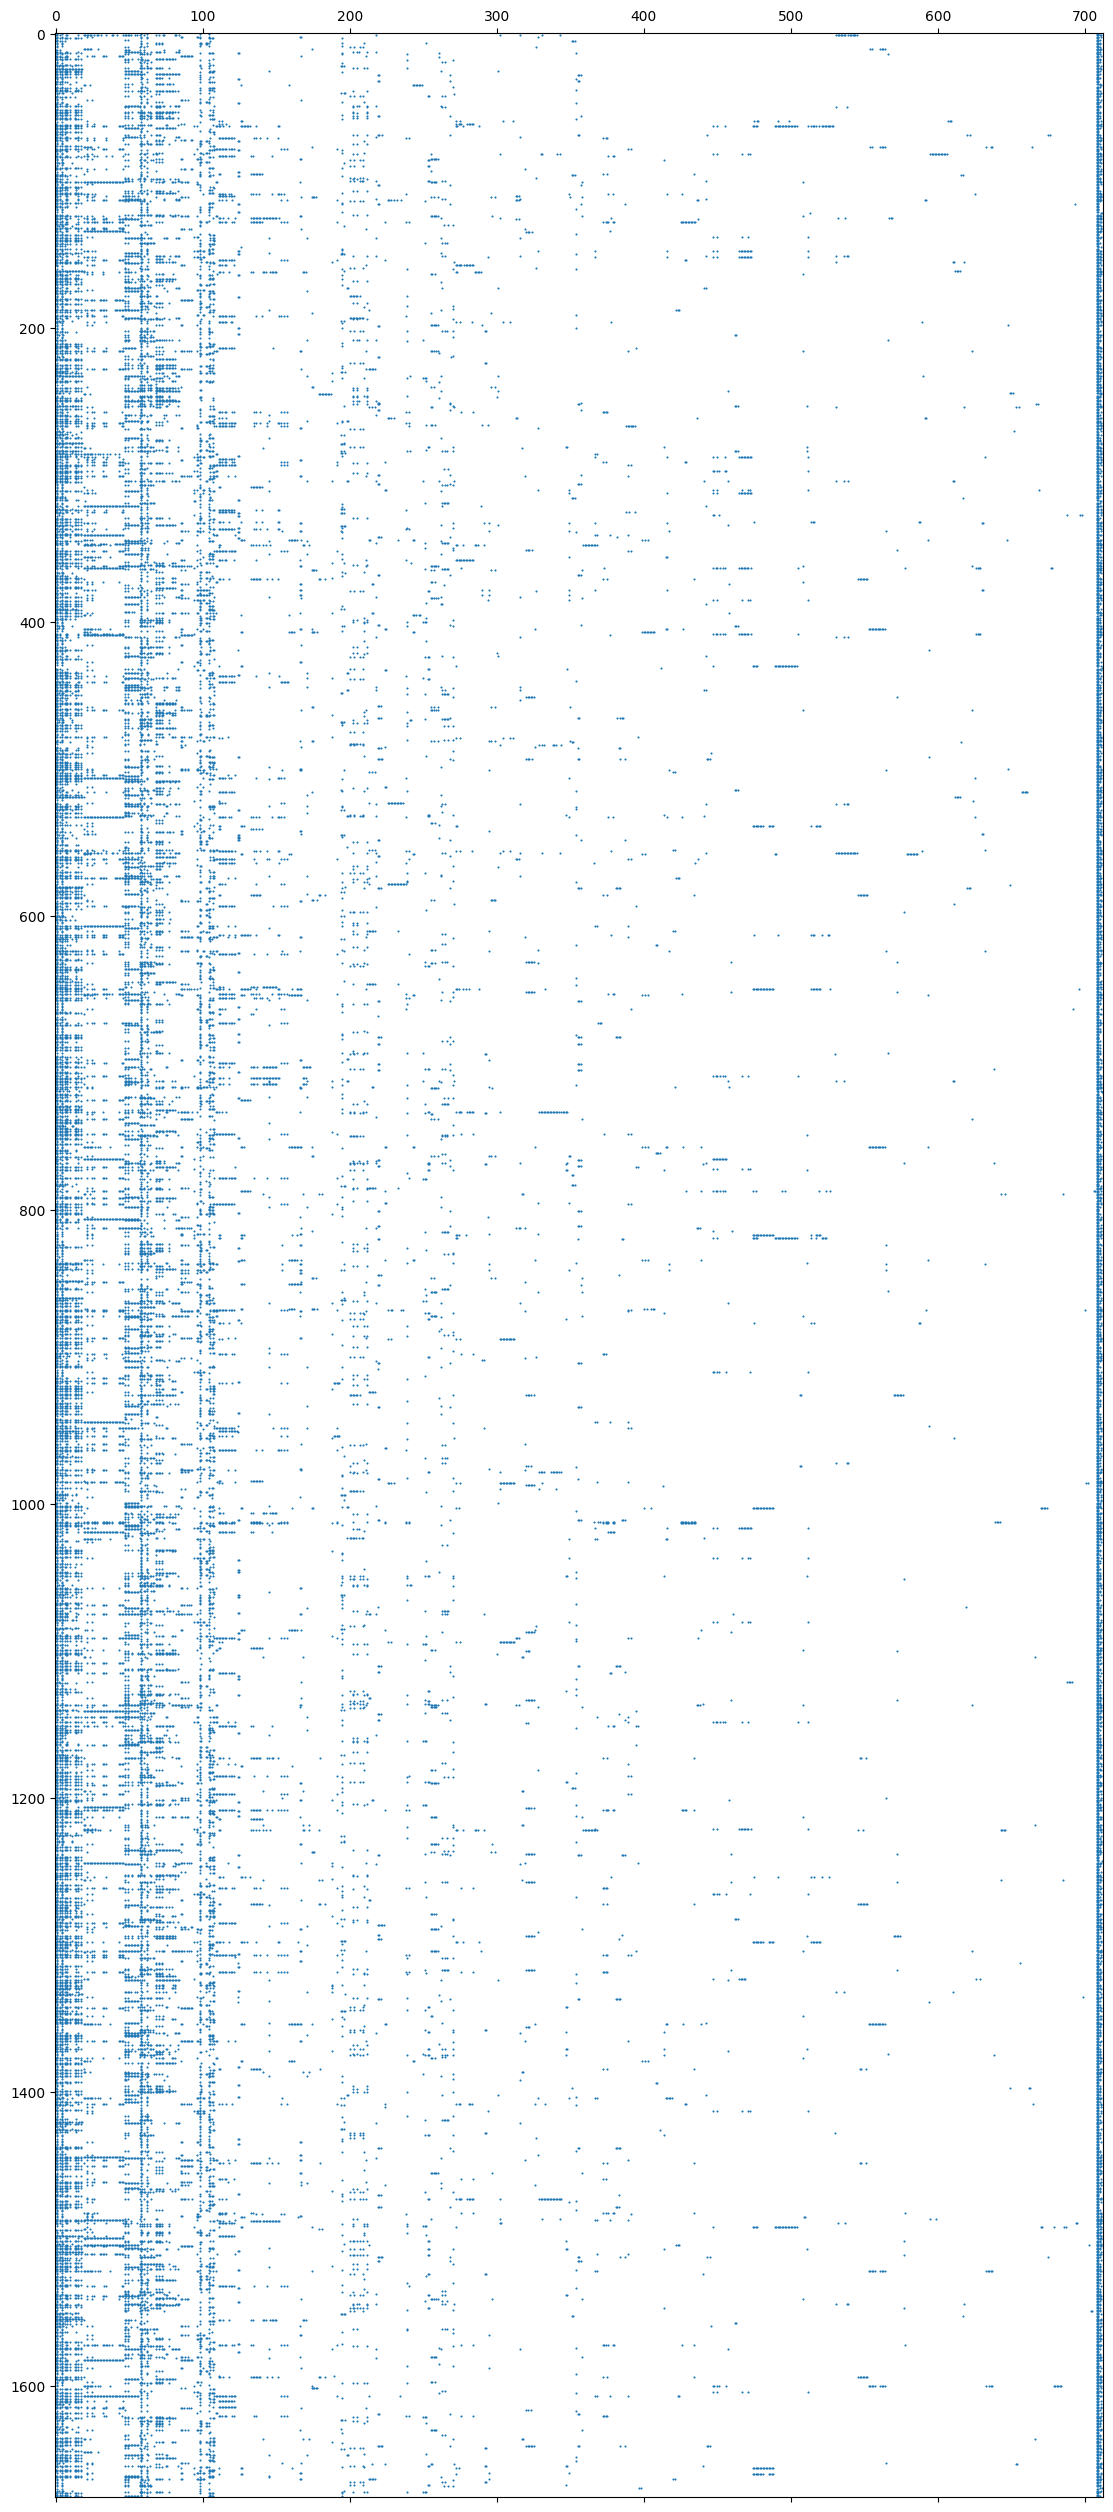

In [6]:
plt.figure(figsize=(20, 32))
plt.spy(X, precision=0, markersize=0.5)
plt.show()

What is the percentage of non-zero elements in table X

In [7]:
print("The percentage of non-zero elements in X is: {:.2f} %".format(np.count_nonzero(X) / X.size * 100))

The percentage of non-zero elements in X is: 2.98 %


Explore the distribution of the output error we are predicting

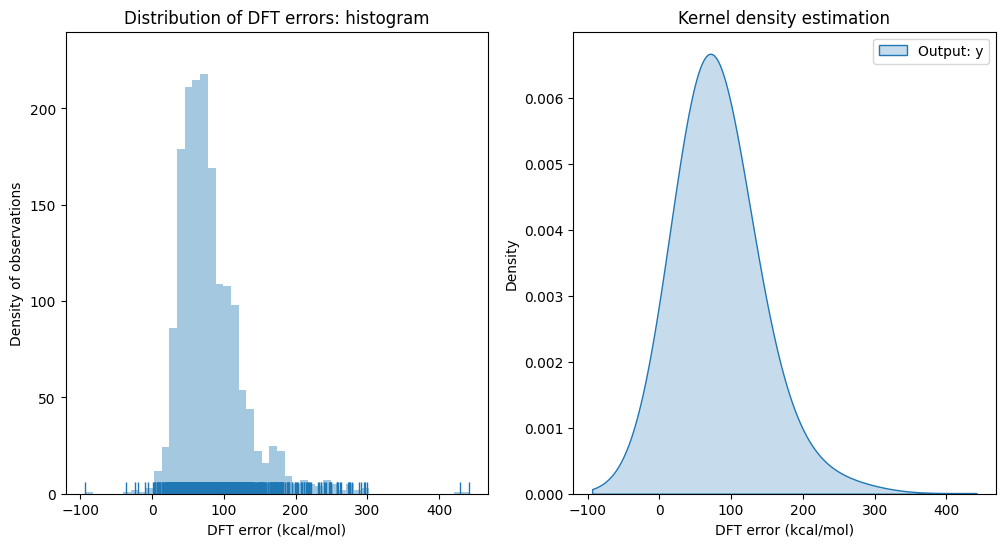

In [8]:
f, axes = plt.subplots(1, 2, figsize=(12, 6))
# Left plot: Histogram
sns.distplot(y, kde=False, norm_hist=False, rug=True, label="Output: y", ax=axes[0])
axes[0].set_title('Distribution of DFT errors: histogram')
axes[0].set_xlabel('DFT error (kcal/mol)')
axes[0].set_ylabel('Count of observations')

# Right plot: Kernel Density Estimation
sns.kdeplot(y, shade=True, clip=(y.min(),y.max()), bw_method=1, label="Output: y", ax=axes[1])
axes[1].set_title('Kernel density estimation')
axes[1].set_xlabel('DFT error (kcal/mol)')
axes[0].set_ylabel('Density of observations')
plt.legend()
plt.show()

Split X and y in training and test sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [10]:
X_train.shape

(838, 713)

In [11]:
X_test.shape

(838, 713)

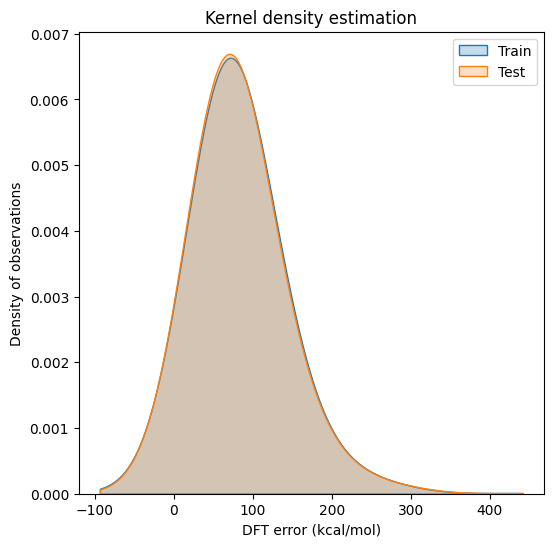

In [12]:
f, axes = plt.subplots(1, 1, figsize=(6, 6))
# Train and Test: Kernel Density Estimation
sns.kdeplot(y_train, shade=True, clip=(y.min(),y.max()), bw_method=1, label="Train")
sns.kdeplot(y_test, shade=True, clip=(y.min(),y.max()), bw_method=1, label="Test")
axes.set_title('Kernel density estimation')
axes.set_xlabel('DFT error (kcal/mol)')
axes.set_ylabel('Density of observations')
plt.legend()
plt.show()

Regularized Ridge algorithm using model with α = 2.

In [64]:
ridge = linear_model.Ridge(alpha=2.0)
# Fit the model
ridge.fit(X_train, y_train)
# Since we're interested in the magnitude of importance and not the direction, we take the absolute values
feature_importances = abs(ridge.coef_)

Calculate the completeness as the percentage of non-zero elements per column.

In [65]:
completeness_percentage = (X_train != 0).sum() / len(X_train) * 100

print(completeness_percentage)

0      52.505967
1      95.584726
2       6.563246
3      51.551313
4      81.742243
         ...    
708    98.926014
709    99.045346
710    50.596659
711    29.116945
712     0.477327
Length: 713, dtype: float64


In [66]:
# Descriptive statistics
min_importance = np.min(feature_importances)
max_importance = np.max(feature_importances)
std_importance = np.std(feature_importances)

print(f"Minimum Importance: {min_importance}")
print(f"Maximum Importance: {max_importance}")
print(f"Standard Deviation: {std_importance}")

# Check the span across orders of magnitude
if max_importance / min_importance > 1000:
    print("Feature importances span several orders of magnitude.")
else:
    print("Feature importances do not span several orders of magnitude.")


Minimum Importance: 0.0
Maximum Importance: 32.460690588799324
Standard Deviation: 3.212043642527455
Feature importances span several orders of magnitude.


In [67]:
# Descriptive statistics for completeness_percentage
min_completeness = np.min(completeness_percentage)
max_completeness = np.max(completeness_percentage)
std_completeness = np.std(completeness_percentage)

print(f"Minimum Completeness: {min_completeness}")
print(f"Maximum Completeness: {max_completeness}")
print(f"Standard Deviation: {std_completeness}")

# Check the span across orders of magnitude for completeness_percentage
if max_completeness / min_completeness > 500:
    print("Completeness percentages span several orders of magnitude.")
else:
    print("Completeness percentages do not span several orders of magnitude.")


Minimum Completeness: 0.0
Maximum Completeness: 99.0453460620525
Standard Deviation: 9.678693284542856
Completeness percentages span several orders of magnitude.


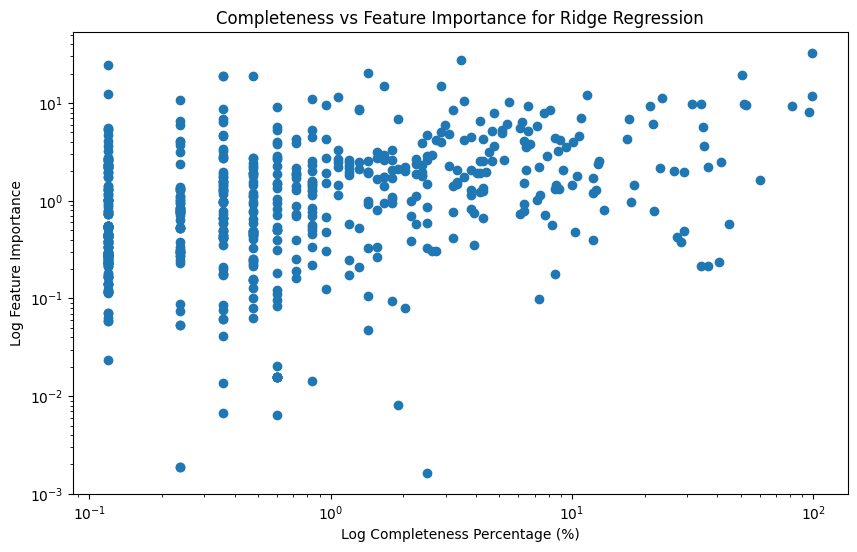

In [68]:

plt.figure(figsize=(10, 6))

# Choose the type of scale based on your preference or data distribution
plt.xscale('log')  # Use if feature importances span several orders of magnitude
plt.yscale('log')  # Use if completeness percentages span several orders of magnitude


# Scatter plot of completeness vs feature importance
plt.scatter(completeness_percentage, feature_importances)

# Adding axis labels and title
plt.xlabel('Log Completeness Percentage (%)')
plt.ylabel('Log Feature Importance')
plt.title('Completeness vs Feature Importance for Ridge Regression')

# Show the plot
plt.show()

## **Discussion**

From the scatter plot provided, the relationship between feature completeness and feature importance for Ridge Regression indicates that the DFT error estimation model's features exhibit a wide range of importance values, as evidenced by the vertical spread of points across several orders of magnitude. This implies that some features have a much greater impact on the model's predictions than others. Additionally, there seems to be no clear trend linking the completeness of a feature with its importance; features with both high and low completeness can have varying levels of importance. This suggests that while some highly complete features are important, others are not, and vice versa.

When it comes to improving the model, it would be beneficial to focus on feature engineering and selection. The current data structure indicates a presence of zero-inflated columns, which could either represent missing information or a lack of variance in the features. For feature engineering, generating polynomial features or interactions between existing features might reveal nonlinear relationships not captured by the current model. Additionally, domain-specific knowledge can be leveraged to create new features that encapsulate physical principles relevant to DFT, such as electronic structure descriptors, which may include calculated properties like electron affinity, ionization potential, or specific atomic interactions.

In terms of feature selection, it's crucial to analyze the contribution of each feature to the model's performance. Features that have minimal impact (low importance) on the model's predictions and are not backed by domain relevance could be considered for removal to simplify the model and possibly reduce overfitting. On the other hand, features with high importance but low completeness might be worth keeping, provided that strategies for dealing with incomplete data are applied, such as robust imputation methods or the collection of additional data. Regularization techniques, which are already part of Ridge Regression, should continue to be fine-tuned to ensure the model is not overly dependent on a small subset of features, thus enhancing the model's ability to generalize to new, unseen data.